# Problem 1 - Digit Recognizer

### Imports

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM

import numpy as np
import matplotlib.pyplot as plt
import warnings, math

warnings.filterwarnings("ignore")

### The dataset

In [14]:
data = np.load('dataset.npz')
X = data['X']
y = data['y']

labels_dict = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: 'A',
    11: 'B',
    12: 'C',
    13: 'D',
    14: 'E',
    15: 'F',
    16: 'Empty'
}

### Splitting the dataset

In [16]:
seed = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

### Visualizing data

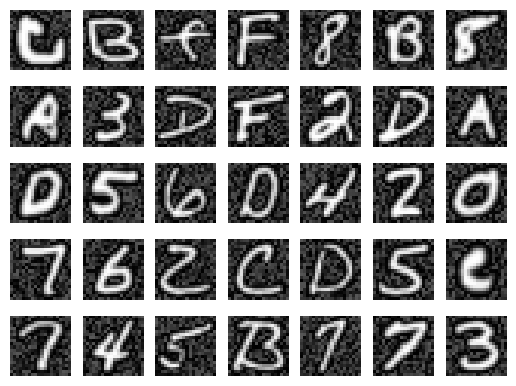

In [12]:
fig, axes = plt.subplots(5, 7)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
    ax.axis('off')
plt.show()

### Visualizing data by class

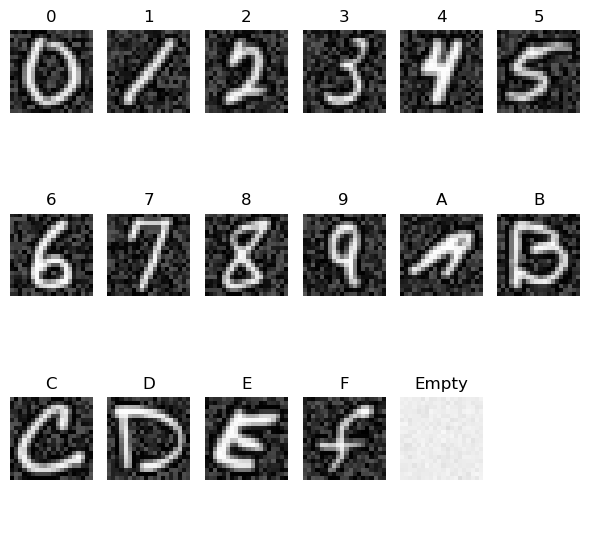

In [23]:
fig, axes = plt.subplots(3, 6, figsize=(6, 6))
axes = axes.ravel()
np.random.seed(42)

for class_label in range(17):
    class_indices = np.where(y_train == class_label)[0]
    random_index = np.random.choice(class_indices)
    
    axes[class_label].imshow(X_train[random_index].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
    axes[class_label].axis('off')
    axes[class_label].set_title(labels_dict[class_label])
     
axes[-1].axis('off')
plt.tight_layout()
plt.show()

### Data Preprocessing

In [4]:
# Remove?

### Model selection - Classifier 1

Here I use SVM

In [62]:
param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_

y_pred_svc = best_svc.predict(X_test)
print(f"SVM Classification Report:\n{classification_report(y_test, y_pred_svc)}")

Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       188
           1       0.92      0.96      0.94        69
           2       0.93      0.89      0.91       158
           3       0.94      0.95      0.94       285
           4       0.88      0.91      0.89       150
           5       0.95      0.90      0.93       209
           6       0.97      0.97      0.97       274
           7       0.93      0.94      0.94       182
           8       0.90      0.88      0.89       128
           9       0.95      0.87      0.91        61
          10       0.91      0.95      0.93       248
          11       0.90      0.85      0.87       157
          12       0.94      0.97      0.95       285
          13       0.89      0.93      0.91       273
          14       0.93      0.59      0.72        22
          15       0.87      0.89     

### Model selection - Classifier 2

Here I use Random forest

In [63]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Best parameters for Random Forest: {'max_depth': 7, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       188
           1       0.92      0.84      0.88        69
           2       0.94      0.59      0.73       158
           3       0.71      0.94      0.81       285
           4       0.77      0.75      0.76       150
           5       0.82      0.64      0.72       209
           6       0.80      0.92      0.85       274
           7       0.72      0.92      0.81       182
           8       0.80      0.55      0.65       128
           9       1.00      0.07      0.12        61
          10       0.71      0.96      0.81       248
          11       0.74      0.48      0.58       157
          12       0.74      0.96      0.84       285
          13       0.74      0.80      0.77       273
          14       0.00      0.00      0.00        22
          15       0.87  

### Classifier Evaluation

In [60]:
svc_accuracy = accuracy_score(y_test, y_pred_svc)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"SVM Test Accuracy: {svc_accuracy:0.3f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:0.3f}")

best_model = best_svc

SVM Test Accuracy: 0.925
Random Forest Test Accuracy: 0.775


### Vizulize the predicted data with confusion matrix
// Remove before delivering

How to read the table: 
- Take the value at row 0, column 0, which is 140. This means that for 140 instances, the true label was 0, and the classifier also predicted 0.
- Now, look at row 0, column 14, which is 30. This means that for 30 instances, the true label was 0, but the classifier incorrectly predicted label 14. 

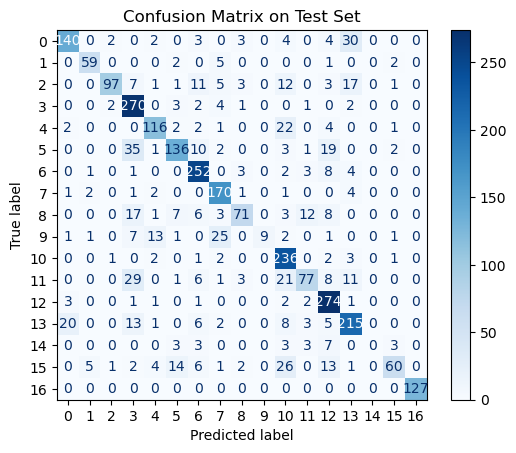

In [29]:
y_pred_test = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.show()

### Testing the classifier agianst the unseen data

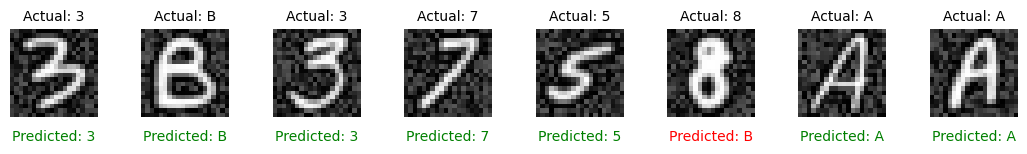

In [72]:
num_samples = 8
indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[indices]
sample_true_labels = y_test[indices]
sample_predicted_labels = y_pred_svc[indices]

fig, axes = plt.subplots(1, num_samples, figsize=(13, 4))  
for i in range(num_samples):
    ax = axes[i]
    ax.imshow(sample_images[i].reshape(20, 20), cmap='gray')
    ax.axis('off')

    actual = labels_dict[sample_true_labels[i]]
    predicted = labels_dict[sample_predicted_labels[i]]

    if actual == predicted:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(f"Actual: {actual}", fontsize=10)
    ax.text(0.5, -0.15, f"Predicted: {predicted}", fontsize=10, color=color, ha='center', va='top', transform=ax.transAxes)

plt.subplots_adjust(wspace=0.5) 

plt.show()

# Problem 2: Dimensionality Reduction

### Standardize the data

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Determine Optimal Number of Components

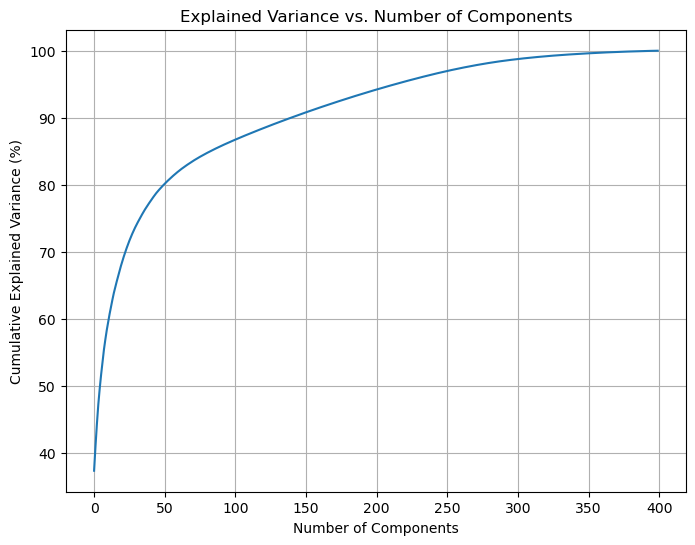

In [18]:
pca = PCA().fit(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

We can choose $k$ such that we retain, for example, 95% of the variance.

In [19]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {k}")

Number of components explaining 95% variance: 214


### Transform Data Using PCA

In [20]:
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Train Classifier on Reduced Data

In [21]:
svc = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svc.fit(X_train_pca, y_train)

SVC(C=10, random_state=42)

### Evaluate performance

In [22]:
y_pred_pca = svc.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Test Accuracy with PCA: {accuracy_pca:.3f}")
print(f"Classification Report with PCA:\n{classification_report(y_test, y_pred_pca)}")

Test Accuracy with PCA: 0.920
Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       188
           1       0.92      0.96      0.94        69
           2       0.93      0.88      0.91       158
           3       0.94      0.95      0.94       285
           4       0.89      0.93      0.91       150
           5       0.94      0.89      0.91       209
           6       0.96      0.96      0.96       274
           7       0.93      0.94      0.94       182
           8       0.87      0.85      0.86       128
           9       0.95      0.85      0.90        61
          10       0.92      0.94      0.93       248
          11       0.88      0.82      0.85       157
          12       0.95      0.97      0.96       285
          13       0.89      0.92      0.90       273
          14       0.76      0.59      0.67        22
          15       0.84      0.88      0.86       135
          16       

# Problem 3: Detecting Out-of-Distribution Images

### The dataset

In [3]:
corrupted_data = np.load('corrupt_dataset.npz')
X_corrupted = corrupted_data['X']

### Visualisation of the corrupted data

We have normal data, but  it seem to inlcude images of clohtes like pants, sweater, dress too. 

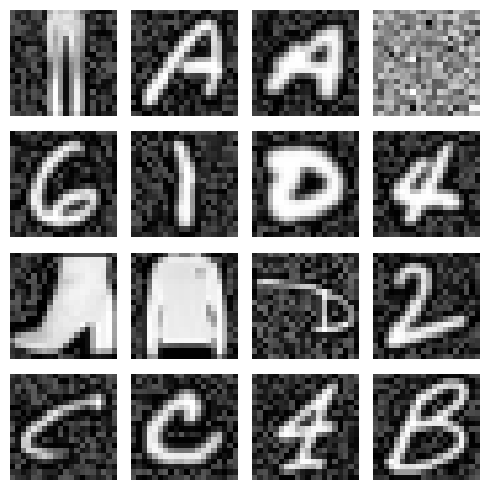

In [13]:
num_images = 16

plt.figure(figsize=(5, 5))
indices = np.random.choice(len(X_corrupted), num_images, replace=False)
for i, idx in enumerate(indices):
    image = X_corrupted[idx].reshape(20, 20)
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Using One-Class SVM to detect outliers

In [49]:
# TODO: Test with others like Isolation Forest,  Local Outlier Factor, ...
X_corrupted_scaled = scaler.transform(X_corrupted)
X_corrupted_pca = pca.transform(X_corrupted_scaled)

ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.04)
ocsvm.fit(X_train_pca)

predictions = ocsvm.predict(X_corrupted_pca)

inlier_indices = np.where(predictions == 1)[0]
outlier_indices = np.where(predictions == -1)[0]

print(f"Number of inliers (numbers/letters): {len(inlier_indices)}")
print(f"Number of outliers (possibly clothes): {len(outlier_indices)}")

Number of inliers (numbers/letters): 856
Number of outliers (possibly clothes): 79


### Visualisation of the outliers

As you can see. It detected many of them. Pants, shoes, empty images, bags. But it also got some wrong.

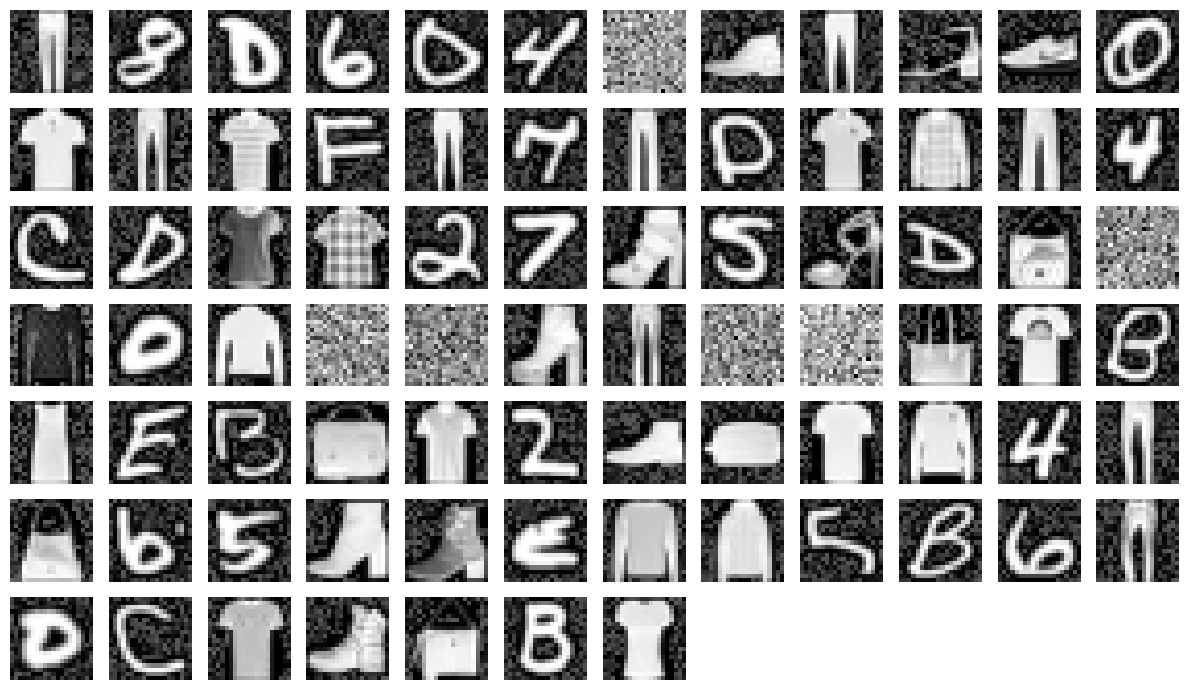

In [50]:
num_images = len(outlier_indices)
cols = 12
rows = math.ceil(num_images / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
axes = axes.flatten()
for i, idx in enumerate(outlier_indices):
    image = X_corrupted[idx].reshape(20, 20)
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

for i in range(len(outlier_indices), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()